<a href="https://colab.research.google.com/github/UdithaChalla08/Oasis-Infobyte/blob/main/Oasis_Infobyte_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imoprting the Libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the Dataset**

In [ ]:
df=pd.read_csv('/content/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


**Describing the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.shape

(1000, 9)

**Checking the data that is there any null values or not**

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


As we can see there is no null values. We are good to go

**Visualize the Dataset**

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Unique values in the dataset


In [ ]:
df.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


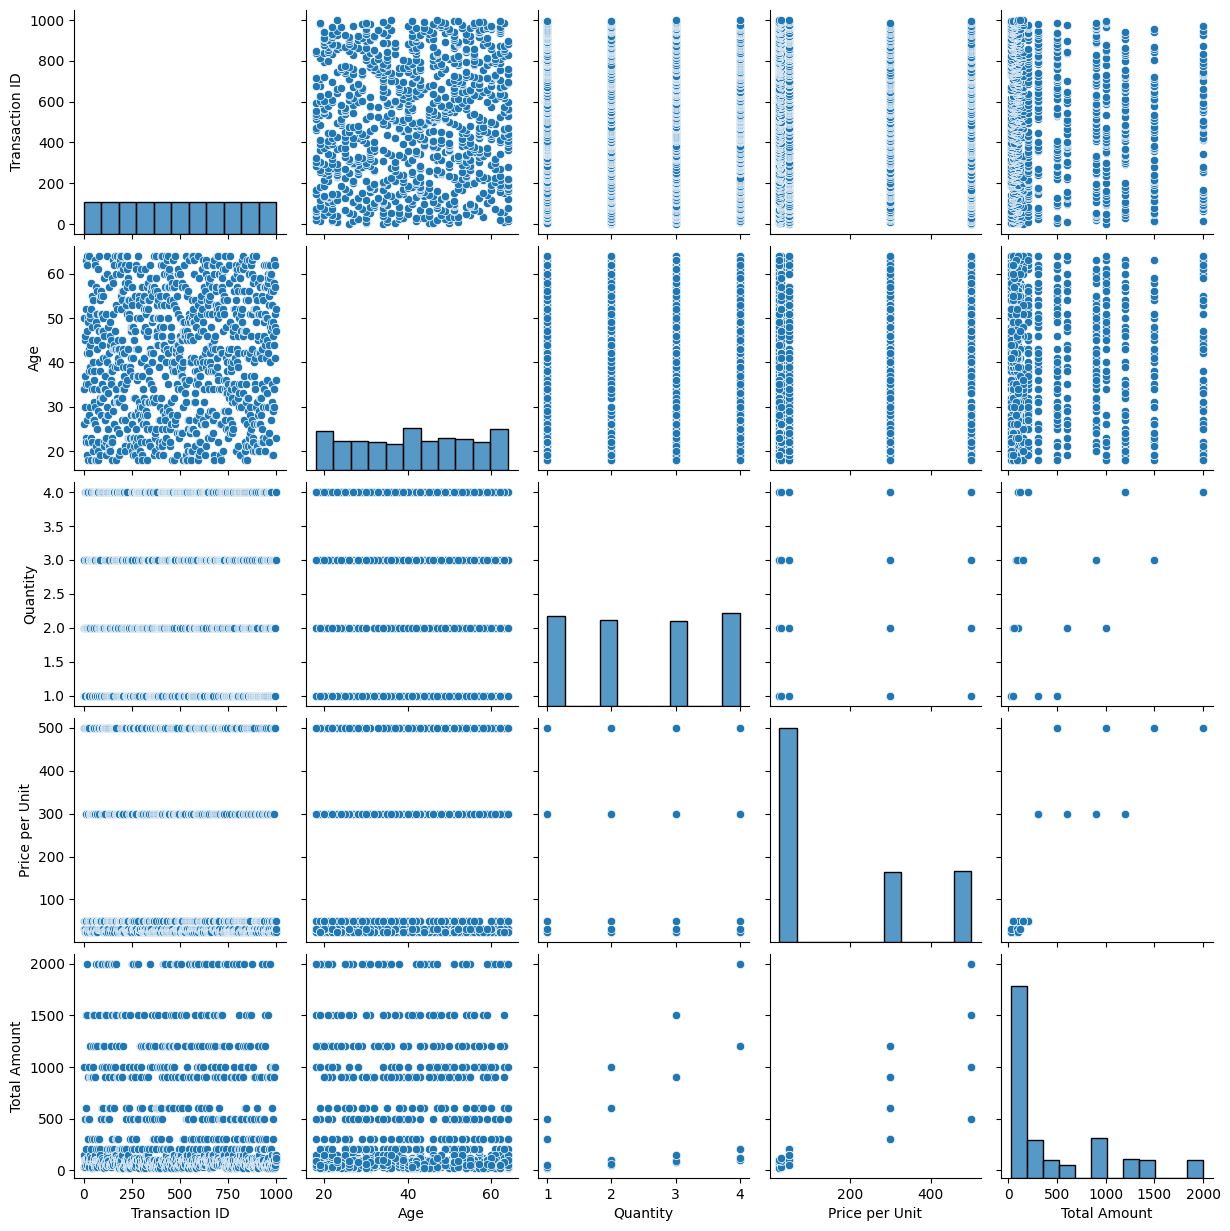

In [ ]:
sns.pairplot(df)

Counting the Products in Product Category

In [ ]:
df[df['Product Category'].isin(['Clothing','Beauty','Electronics'])]['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


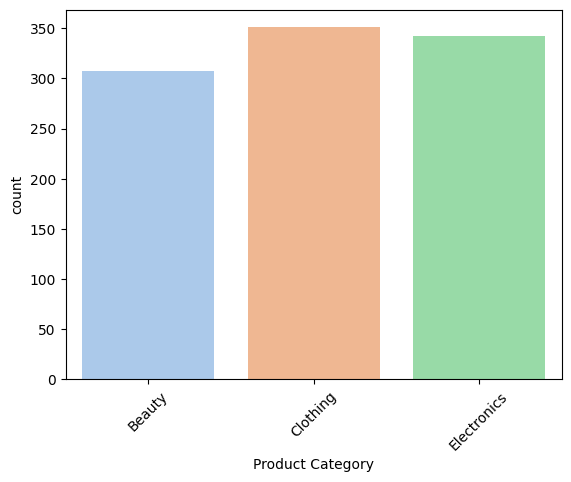

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#example count plot with a color palette
sns.countplot(x=df['Product Category'],palette='pastel')

#Rotate x labels if needed
plt.xticks(rotation=45)
plt.show()

**Group your data by 'product category' and summarize it by quantity and total amount**


In [ ]:
df.groupby('Product Category')[['Quantity','Total Amount']].sum()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


**Comparision using Bar Graph**


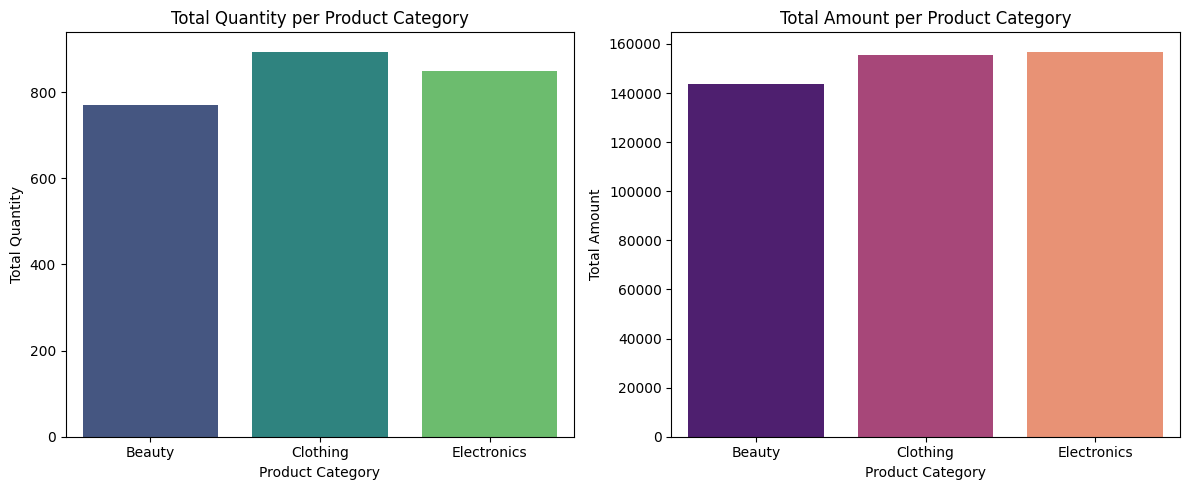

In [ ]:
category_summary = df.groupby('Product Category')[['Quantity', 'Total Amount']].sum().reset_index()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Product Category', y='Quantity', data=category_summary, palette='viridis')
plt.title('Total Quantity per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity')

plt.subplot(1, 2, 2)
sns.barplot(x='Product Category', y='Total Amount', data=category_summary, palette='magma')
plt.title('Total Amount per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()

**Create a pie chart for showing the Percentage for each Product Category**


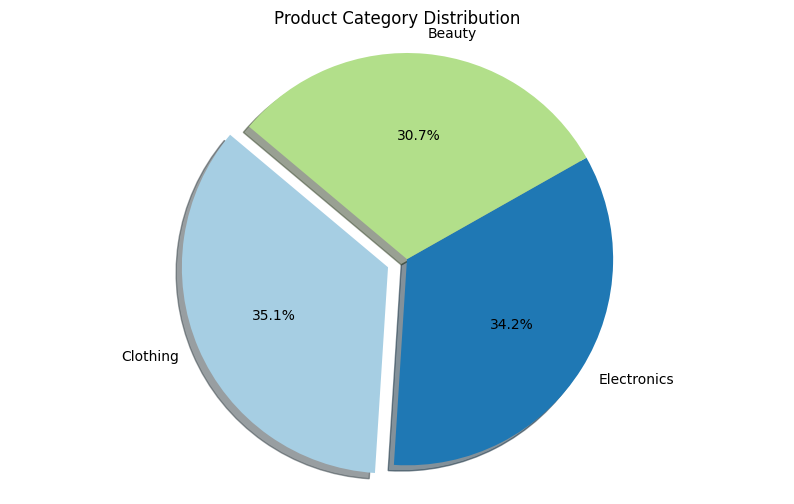

In [ ]:
# Count occurrences of each product category
category_counts = df['Product Category'].value_counts()

# Define explode to highlight the largest category
explode_list = [0.1 if i == category_counts.idxmax() else 0 for i in category_counts.index]

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',  # Display percentage values
    colors=plt.cm.Paired.colors,  # Different colors for categories
    explode=explode_list,  # Highlighting the highest value
    startangle=140,
    shadow=True
)

plt.title("Product Category Distribution")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()


**Split the Dates into day month and Year**


In [ ]:
# seeing the date column
df['Date'] = pd.to_datetime(df['Date'])

# add 'month' column and extract month from date
df['Month'] = df['Date'].dt.month_name()

df['Month']


,Month
0,November
1,February
2,January
3,May
4,May
...,...
995,May
996,November
997,October
998,December


**Total Sales Amount over each month**

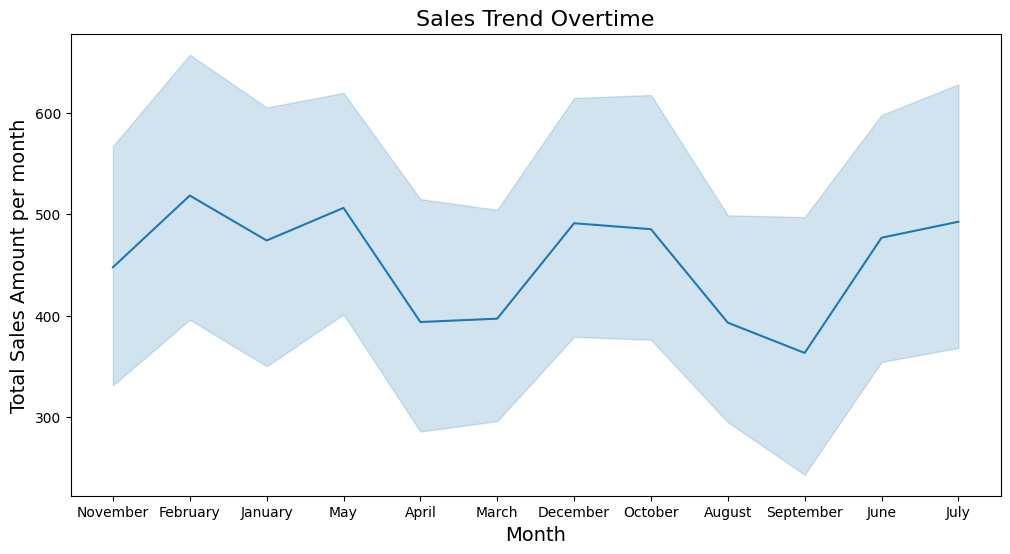

In [ ]:
# Sales trends Overtime
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Total Amount', data=df)
plt.title('Sales Trend Overtime', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount per month', fontsize=14)
plt.show()


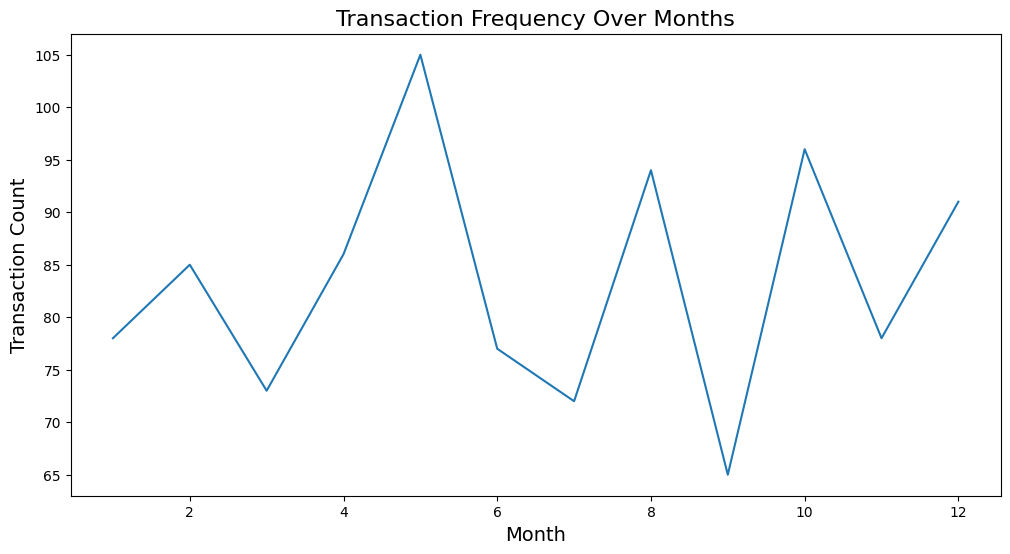

In [ ]:
df['Month'] = df['Date'].dt.month    # Extract month number from Date

transaction_count = df.groupby('Month')['Transaction ID'].count()

plt.figure(figsize=(12,6))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()


**Transaction frequency over each month**


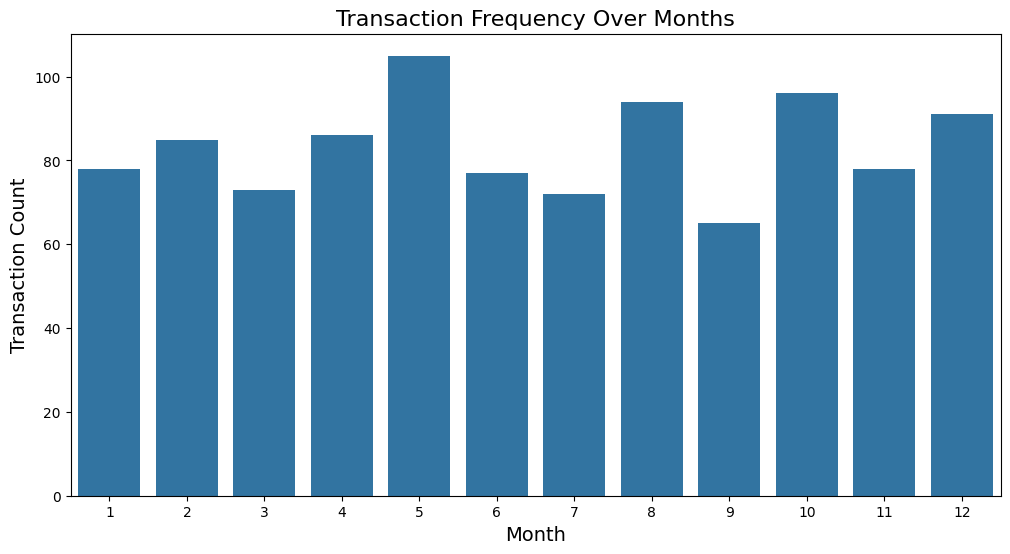

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()


**Sales Heatmap**

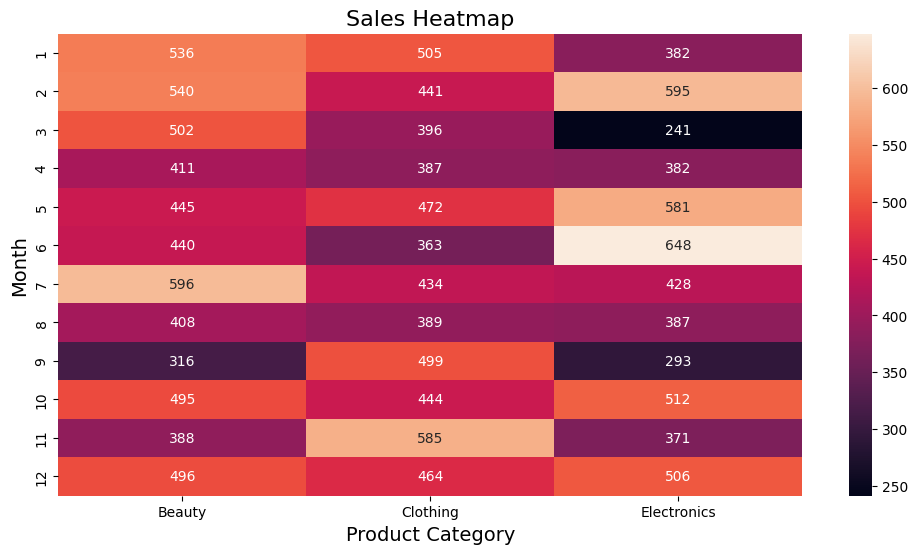

In [ ]:
heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()


**Gender for Male and Female**

In [ ]:
df['Age'].count()

np.int64(1000)

In [ ]:
df[df['Gender'].isin(['Male','Female'])]['Gender'].value_counts()

,count
Gender,
Female,510
Male,490


**Pie Chart**


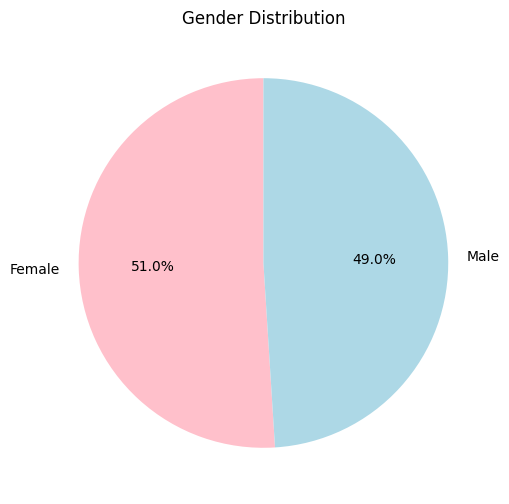

In [ ]:
gender_counts = {'Female': 510, 'Male': 490}   # Use your actual value_counts if different

# Plot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values(), labels=gender_counts.keys(), autopct='%1.1f%%',
        colors=['pink', 'lightblue'], startangle=90)
plt.title('Gender Distribution')
plt.show()


**Bining the Age**

In [ ]:
age_bins = [0, 18, 25, 35, 50, 65]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_group)
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,26-35


**Distribution of the Age and Gender coloumn in Product Category**

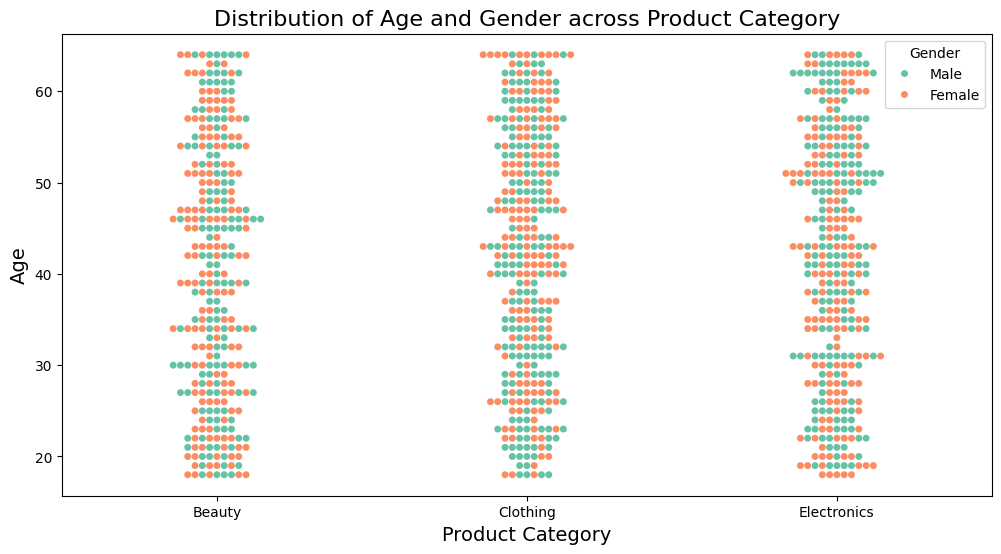

In [ ]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Age and Gender across Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Gender', loc='upper right', fontsize=10)
plt.show()


**Histogram for count of Age persons**

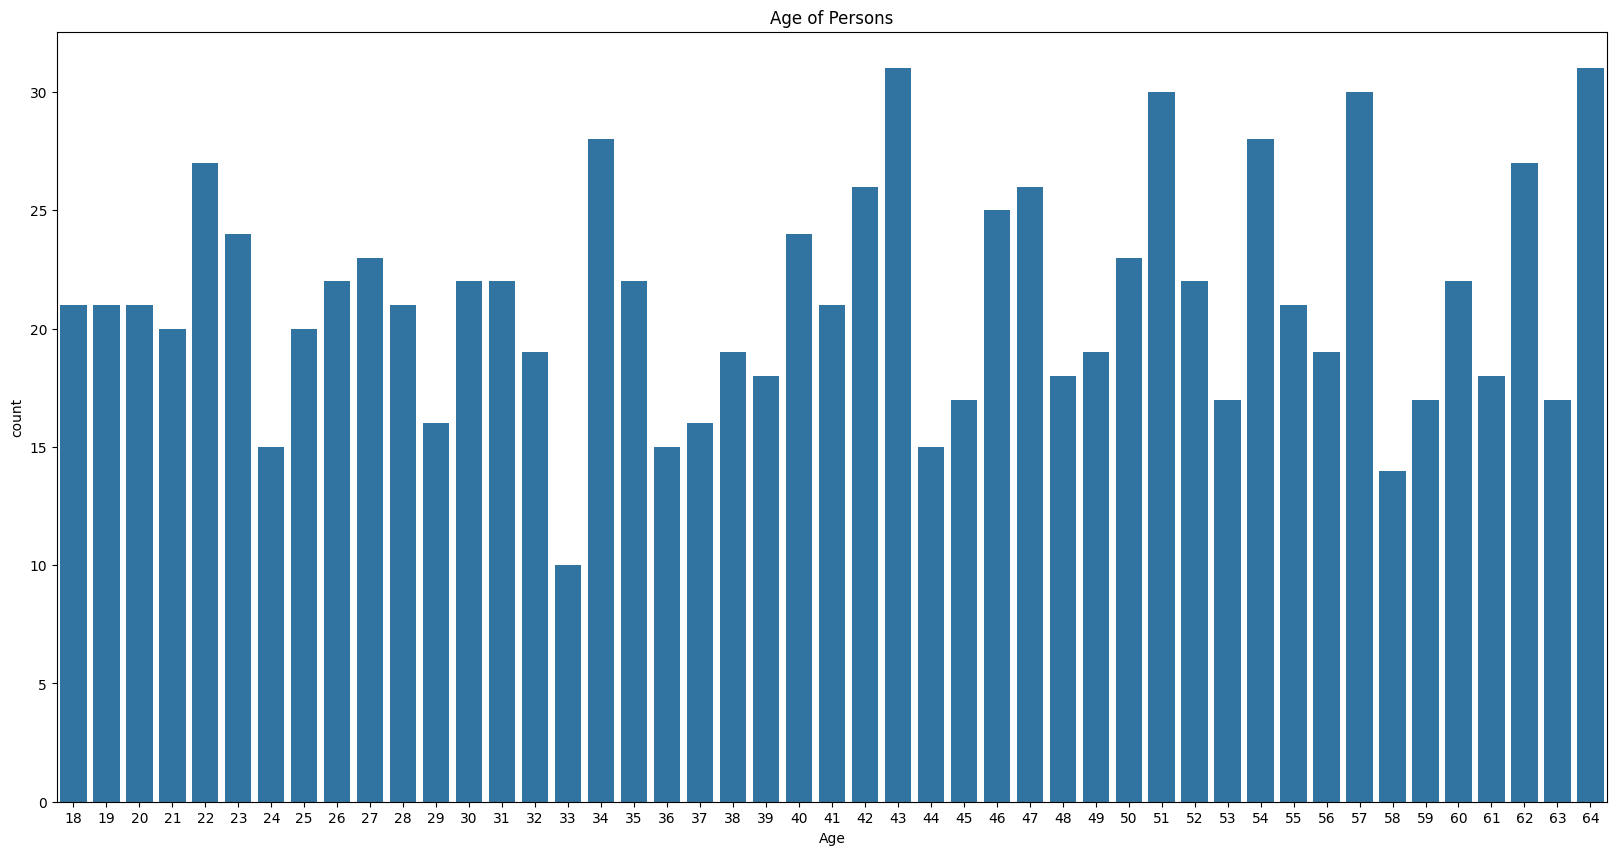

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Age of Persons")
plt.xlabel("Age")
sns.countplot(x='Age', data=df)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
 10  Age Group         1000 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 75.5+ KB


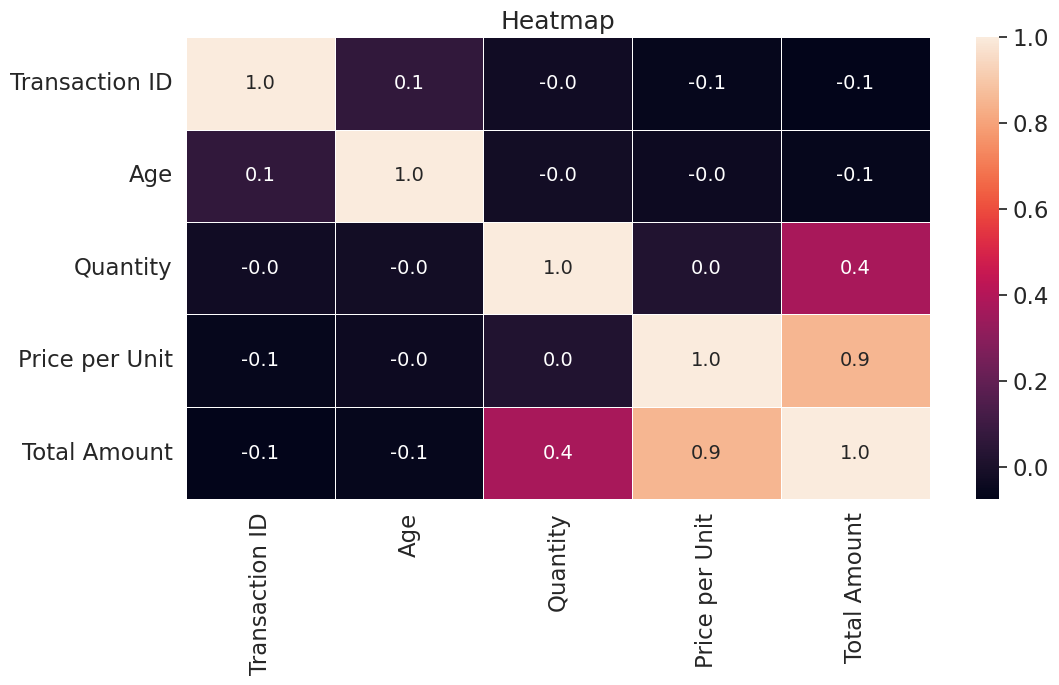

In [ ]:
correlation = df[df.dtypes[df.dtypes == 'int64'].index].corr()

sns.set(font_scale=1.5)
plt.figure(figsize=(12,6))
plt.title("Heatmap", fontsize=18)
ax = sns.heatmap(correlation, annot=True, annot_kws={"size": 14}, fmt='.1f', linewidths=.5)
plt.show()
